In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [4]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [5]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

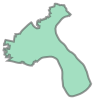

In [6]:
zipcodes.loc[0, 'geometry']

In [8]:
Bikerack = gpd.read_file('../data/Bike Racks (GIS).geojson')
print(Bikerack.crs)
Bikerack.head( )

EPSG:4326


,detail_loc,quantity,location,domain,idnumber,objectid,status,lon,type,data_colle,lat,capacity,geometry
0,Hickory Hollow Mall,1,Mall,Public,113,1,Existing,-86.6554527779,Rack,Health Dept,36.0499277778,12,POINT (-86.65545 36.04993)
1,Stones River Greenway - Donelson/Hermitage Area,2,Greenway,Public,114,2,Existing,-86.6340625226,Rack,Health Dept,36.1852800378,4,POINT (-86.63406 36.18528)
2,"Percy Priest Reservoir, Stones River Greenway",0,Park/Greenway,Public,256,3,Proposed,-86.6206705697,Rack,Health Dept,36.1584215986,0,POINT (-86.62067 36.15842)
3,"Two Rivers Golf Course, Stones River Greenway ...",1,Park/Greenway,Public,115,4,Existing,-86.6865259267,Rack,Health Dept,36.1875466948,5,POINT (-86.68653 36.18755)
4,East Park & Community Center,3,Park/Community Center,Public,103,5,Existing,-86.7621800831,Rack,Health Dept,36.1724554062,15,POINT (-86.76218 36.17246)


In [9]:
Bikerack.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   detail_loc  430 non-null    object  
 1   quantity    430 non-null    object  
 2   location    430 non-null    object  
 3   domain      430 non-null    object  
 4   idnumber    430 non-null    object  
 5   objectid    430 non-null    object  
 6   status      430 non-null    object  
 7   lon         426 non-null    object  
 8   type        430 non-null    object  
 9   data_colle  430 non-null    object  
 10  lat         426 non-null    object  
 11  capacity    430 non-null    object  
 12  geometry    430 non-null    geometry
dtypes: geometry(1), object(12)
memory usage: 43.8+ KB


In [10]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
bike_geo = gpd.GeoDataFrame(Bikerack, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(Bikerack.lon, Bikerack.lat))

In [14]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [15]:
Bikerack_by_zip = gpd.sjoin(bike_geo, zipcodes, predicate = 'within')

In [16]:
Bikerack_by_zip.head()

,detail_loc,quantity,location,domain,idnumber,objectid,status,lon,type,data_colle,lat,capacity,geometry,index_right,zip,po_name
0,Hickory Hollow Mall,1,Mall,Public,113,1,Existing,-86.6554527779,Rack,Health Dept,36.0499277778,12,POINT (-86.65545 36.04993),51,37013,ANTIOCH
140,Cole Elementary School,1,Elementary School,Public,174,141,Existing,-86.6982749997,Rack,Health Dept,36.0590833331,20,POINT (-86.69827 36.05908),51,37013,ANTIOCH
141,Antioch Middle School,0,Middle School,Public,331,142,Proposed,-86.6721262461,Rack,Health Dept,36.055141113,0,POINT (-86.67213 36.05514),51,37013,ANTIOCH
142,J E Moss Elementary School,2,Elementary School,Public,175,143,Existing,-86.6693833338,Rack,Health Dept,36.0672500001,52,POINT (-86.66938 36.06725),51,37013,ANTIOCH
143,Apollo Middle School,2,Middle School,Public,176,144,Existing,-86.6642388884,Rack,Health Dept,36.0670777782,56,POINT (-86.66424 36.06708),51,37013,ANTIOCH


In [17]:
Bikerack_by_zip['zip'].value_counts()

zip
37203    51
37201    44
37206    36
37209    31
37219    29
37208    28
37207    21
37210    20
37211    17
37216    17
37013    16
37115    16
37214    15
37076    13
37218    10
37221    10
37228     8
37217     8
37212     7
37205     7
37213     5
37204     4
37215     3
37138     3
37220     3
37189     2
37080     1
37072     1
Name: count, dtype: int64

In [22]:
Bikerack_in_37203 = Bikerack_by_zip.loc[Bikerack_by_zip['zip'] == '37203']
Bikerack_in_37203.shape

(51, 16)

In [25]:
polygon37203 = zipcodes.loc[zipcodes['zip'] == '37203']
polygon37203.shape

(1, 3)

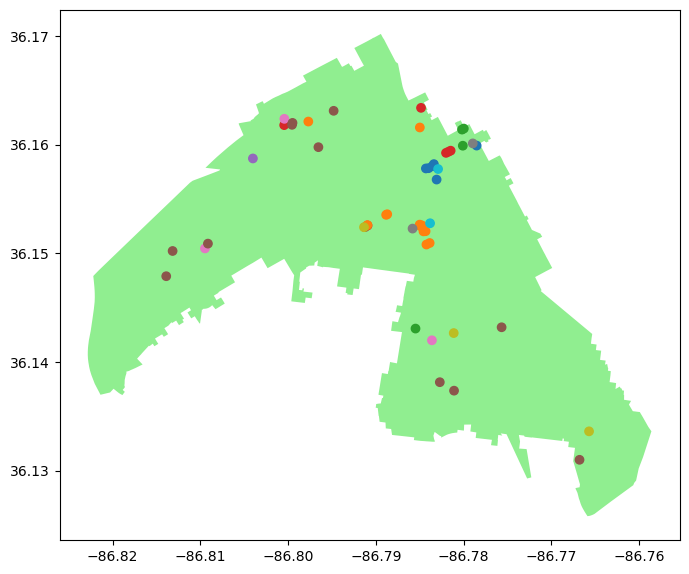

In [27]:
ax = polygon37203.plot(figsize = (8, 10), color = 'lightgreen')
Bikerack_in_37203.plot( ax = ax, column = 'location');
plt.show();

In [28]:
polygon37203.geometry.centroid

C:\Users\Dell\AppData\Local\Temp\ipykernel_3816\651956959.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37203.geometry.centroid


35    POINT (-86.78899 36.14860)
dtype: geometry

In [31]:
center = polygon37203.geometry.centroid[35]
print(center)

POINT (-86.7889889966741 36.14860232841574)


C:\Users\Dell\AppData\Local\Temp\ipykernel_3816\4090195936.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37203.geometry.centroid[35]


In [32]:
area_center = [center.y, center.x]
print(area_center)

[36.14860232841574, -86.7889889966741]


In [33]:
map_37203 = folium.Map(location =  area_center, zoom_start = 12)
map_37203

In [39]:
map_37203 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37203).add_to(map_37203)
for row_index, row_values in Bikerack_in_37203.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['lon'])
    icon=folium.Icon(color="blue",icon="Bike", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37203)
map_37203.save('../maps/map37203.html')
map_37203

In [40]:
folium.Map?

Init signature:
folium.Map(
    location=None,
    width='100%',
    height='100%',
    left='0%',
    top='0%',
    position='relative',
    tiles='OpenStreetMap',
    attr=None,
    min_zoom=0,
    max_zoom=18,
    zoom_start=10,
    min_lat=-90,
    max_lat=90,
    min_lon=-180,
    max_lon=180,
    max_bounds=False,
    crs='EPSG3857',
    control_scale=False,
    prefer_canvas=False,
    no_touch=False,
    disable_3d=False,
    png_enabled=False,
    zoom_control=True,
    **kwargs,
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tileset URL. The following tilesets are built-in
to Folium. Pass any of the following to the "tiles" keyword:

    - "OpenStreetMap"
    - "Mapbox Bright" (Limited levels of zoom for free tiles)
    - "Mapbox Control Room" (Limited levels of zoom for free tiles)
    - "Stamen" (Terrain, Toner, and Watercolor)
    - "Cloudmade" (Must pass API key)
    - "Mapb

In [43]:
cluster_map_37203 = folium.Map(location =  area_center, zoom_start = 12)
marker_cluster = MarkerCluster().add_to(cluster_map_37203)

folium.GeoJson(polygon37203).add_to(cluster_map_37203)

# inside the loop add each marker to the cluster
for row_index, row_values in Bikerack_in_37203.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['location'])
    icon=folium.Icon(color="blue",icon="Bike", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    cluster_map_37203.save('../maps/cluster37203.html')

cluster_map_37203

In [46]:

folium.GeoJson(polygon37203).add_to(map_37203)
locations = Bikerack_in_37203[['lat', 'lon']].values.tolist()
map_37203.add_child(
    FastMarkerCluster(locations)
)

map_37203